In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sympy as smp
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences

In [2]:
scope1 = pd.read_csv("scope_2.csv")
scope2 = pd.read_csv("scope_3.csv")
scope3 = pd.read_csv("scope_4.csv")
scope4 = pd.read_csv("scope_28.csv")
scope5 = pd.read_csv("scope_29.csv")

### Butterworth and derivative Function

In [3]:

def butter(signal,fc):
#     fc = 250
    fs = 30000
    wn = fc/15000
    b, a = scipy.signal.butter(2,wn, 'low', analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)
    return y

def derivate(signal):
    signal = np.array(signal)
    return np.diff(signal)


#### Plotting Function

In [1]:
def plotting(scope,title):
    xdata = scope.iloc[:,0]
    xdatanew = (xdata+0.00025)*10000
    ydata = scope.iloc[:,1]
    filt = butter(ydata,250)
    diff = derivate(filt)
    filt_diff = butter(diff,30)
    plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.title(f"Original signal {title}")
    plt.plot(xdatanew,ydata)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.subplot(222)
    plt.title("Filtered signal")
    plt.plot(xdatanew,filt)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.subplot(223)
    plt.title("Differentiated signal")
    plt.plot(xdatanew[:1998],diff)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.subplot(224)
    plt.title("Filtered Differentiated signal ")
    plt.plot(xdatanew[:1998],filt_diff)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.show()

In [2]:
plotting(scope3,"scope_2")

NameError: name 'scope3' is not defined

In [3]:
plotting(scope2,"scope_3")

NameError: name 'scope2' is not defined

In [4]:
# plotting(scope3,"scope_4")

In [ ]:
# plotting(scope4,"scope_28")

In [ ]:
# plotting(scope5,"scope_29")

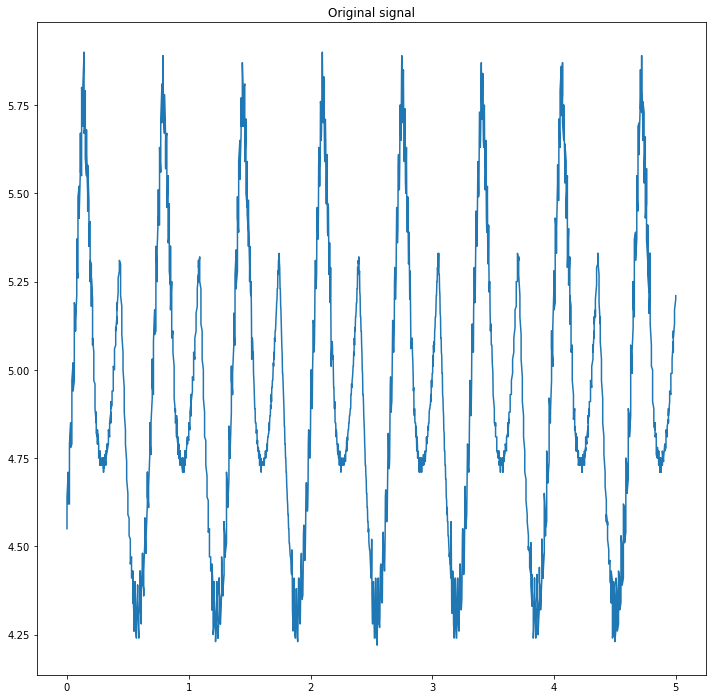

In [7]:
xdata = scope1.iloc[:,0]
xdatanew = (xdata+0.00025)*10000
ydata = scope1.iloc[:,1]
filt = butter(ydata,250)
diff = derivate(filt)
filt_diff = butter(diff,30)
plt.figure(figsize=(12,12))

plt.title("Original signal")
plt.plot(xdatanew[:1999],ydata)
plt.show()


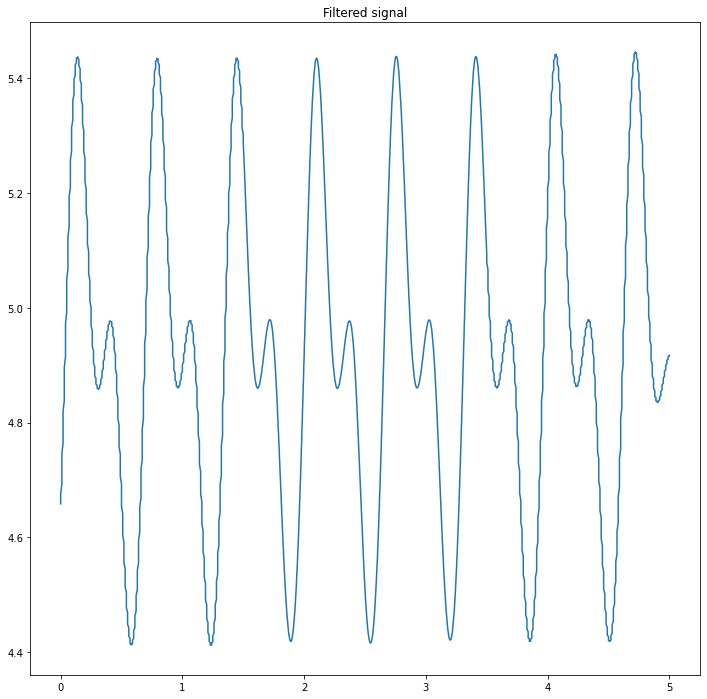

In [8]:

plt.figure(figsize=(12,12))
plt.title("Filtered signal")
plt.plot(xdatanew[:1999],filt)
plt.show()


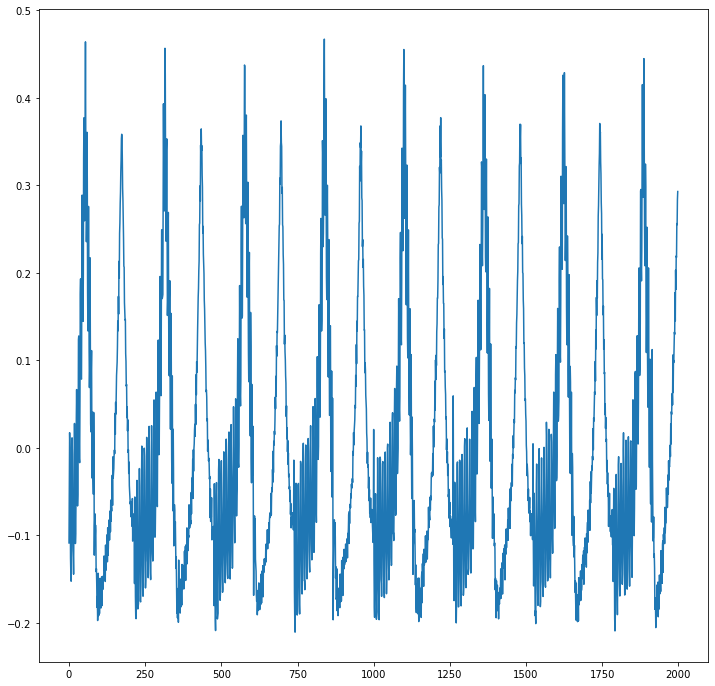

In [9]:
s_n = ydata-filt
plt.figure(figsize=(12,12))
plt.plot(s_n)

#####  SNR 

In [10]:
#  Finding Signal to Noise ratio 
#  Task 3

def SNR(signal,fc):
    filt = butter(signal,fc)
    noise = signal-filt
    x1 = np.average(filt**2)
    x2 = np.average(noise**2)
    return 10*(np.log10((x1)/x2))
   

In [11]:
l = []
for i in range(150,450,50):
    l.append([i,SNR(scope1,i)])

df = pd.DataFrame(l, columns = ["Frequncy","SNR in(dB)"])
print(df)

   Frequncy  SNR in(dB)
0       150   25.025159
1       200   27.376235
2       250   30.265273
3       300   33.002409
4       350   35.125288
5       400   36.632643


In [12]:
l = []
for i in range(150,450,50):
    l.append([i,SNR(scope2,i)])

df = pd.DataFrame(l, columns = ["Frequncy","SNR in(dB)"])
print(df)

   Frequncy  SNR in(dB)
0       150   25.079987
1       200   27.420193
2       250   30.298141
3       300   33.030764
4       350   35.150335
5       400   36.651505


In [13]:
l = []
for i in range(150,450,50):
    l.append([i,SNR(scope3,i)])

df = pd.DataFrame(l, columns = ["Frequncy","SNR in(dB)"])
print(df)

   Frequncy  SNR in(dB)
0       150   25.131474
1       200   27.445778
2       250   30.332760
3       300   33.098418
4       350   35.258833
5       400   36.799296


In [14]:
l = []
for i in range(150,450,50):
    l.append([i,SNR(scope4,i)])

df = pd.DataFrame(l, columns = ["Frequncy","SNR in(dB)"])
print(df)

   Frequncy  SNR in(dB)
0       150   25.549497
1       200   27.933245
2       250   30.859435
3       300   33.609286
4       350   35.783133
5       400   37.402617


In [15]:
l = []
for i in range(150,400,50):
    l.append([i,SNR(scope5,i)])

df = pd.DataFrame(l, columns = ["Frequncy","SNR in(dB)"])
print(df)

   Frequncy  SNR in(dB)
0       150   25.658290
1       200   28.009793
2       250   30.903044
3       300   33.633242
4       350   35.798680


#### Find Peaks


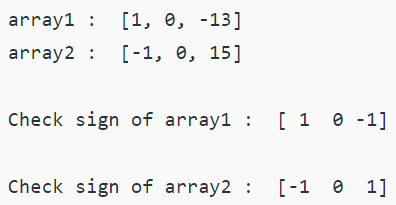

In [16]:
from numpy import *
def FindPeaks(signal):
    peaks, _ = find_peaks(signal) # local Maximum
    b = (diff(sign(diff(signal))) > 0).nonzero()[0] + 1 #The +1 is important, because diff reduces the original index number.
    #local minimum
    plt.plot(signal)
    plt.plot(peaks, signal[peaks], "o")
    plt.plot(b, signal[b], "*") 
    plt.show()



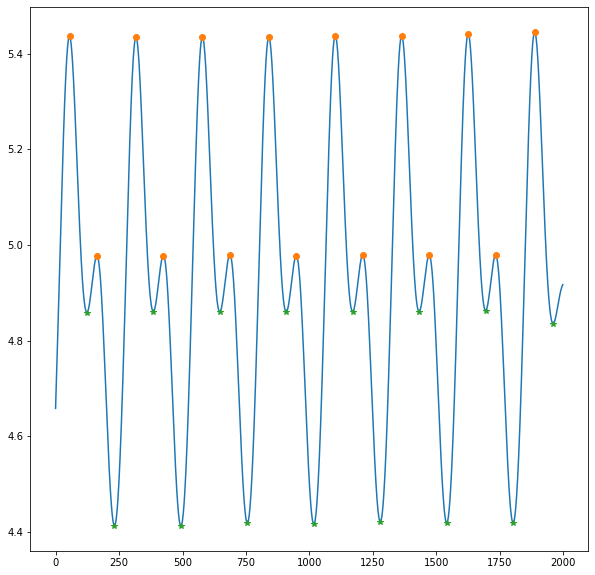

In [17]:
plt.figure(figsize=(10,10))
FindPeaks(filt)

(-50.0, 900.0)

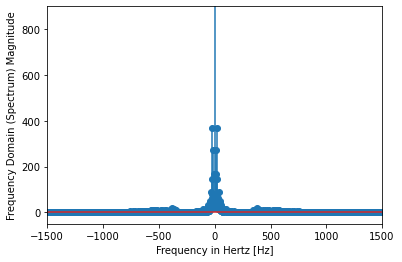

In [19]:
from scipy import fftpack

f_s = 3000
ydata = np.array(ydata)
X = fftpack.fft(ydata)
freqs = fftpack.fftfreq(len(ydata)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
# ax.set_xlim(0,150)
ax.set_ylim(-50, 900)

(-50.0, 900.0)

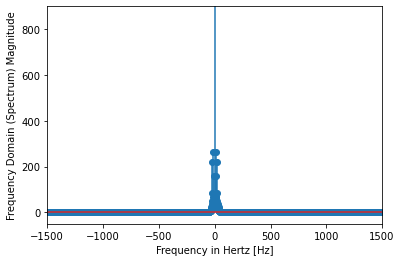

In [18]:
from scipy import fftpack

f_s = 3000
filt = np.array(filt)
X = fftpack.fft(filt)
freqs = fftpack.fftfreq(len(filt)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
# ax.set_xlim(0,150)
ax.set_ylim(-50, 900)

In [ ]:

plt.magnitude_spectrum(filt, 30000, color='C1')
plt.show()

In [ ]:
plt.figure(figsize=(12,12))

plt.title("filtered differentiated signal")
plt.plot(xdatanew[:1998],filt_diff)
plt.show

In [ ]:
from scipy import fftpack

f_s = 3000
X = fftpack.fft(filt_diff)
freqs = fftpack.fftfreq(len(filt_diff)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
# ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_xlim(0,25)
ax.set_ylim(-5, 900)

In [34]:
def butter2(signal):
    fc = 20
    fs = 400
    wn = 2*fc/fs
    b, a = scipy.signal.butter(2,wn, 'low',output='ba', analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)
    return y

def derivate(signal):
    return np.diff(signal)

In [35]:
def plotting(scope,title):
    xdata = scope.iloc[:,0]
    xdatanew = (xdata+0.00025)*10000
    ydata = scope.iloc[:,1]
    filt = butter2(ydata)
    diff = derivate(filt)
    filt_diff = butter2(diff)

    plt.figure(figsize=(12,12))
    plt.subplot(221)
    plt.title(f"Original signal {title}")
    plt.plot(xdatanew,ydata)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.subplot(222)
    plt.title("Filtered signal")
    plt.plot(xdatanew,filt)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.subplot(223)
    plt.title("Differentiated signal")
    plt.plot(xdatanew[:1998],diff)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.subplot(224)
    plt.title("Filtered Differentiated siganl ")
    plt.plot(xdatanew[:1998],filt_diff)
    plt.xlabel("Time (in sec)")
    plt.ylabel("Amplitude (in V)")
    plt.show()

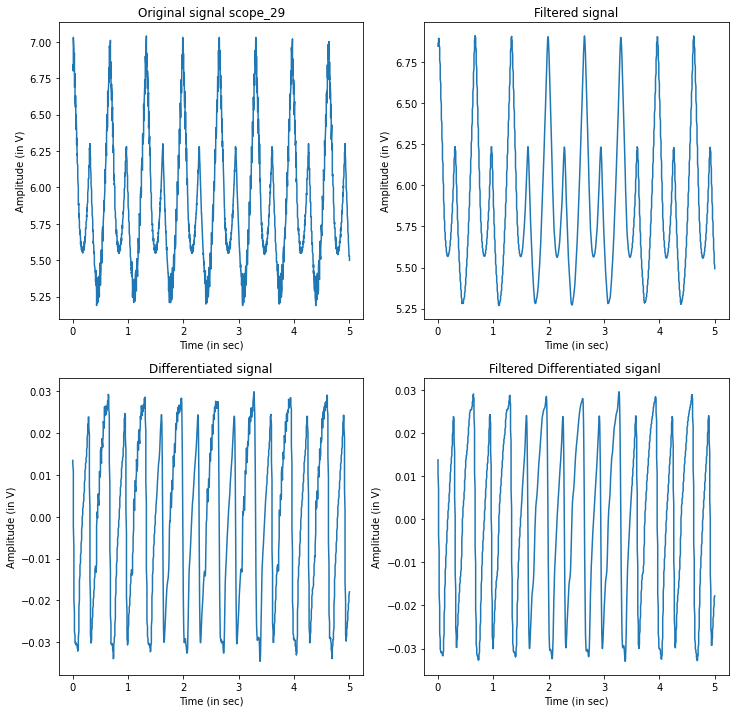

In [36]:
plotting(scope5,"scope_29")

In [52]:
11%3

2